# Interpolate

In [1]:
from smpl import plot
from smpl import stat
from smpl import data
from smpl import interpolate
import numpy as np

from smpl import interpolate as interp
from uncertainties import unumpy as unp

## Interpolate 1d

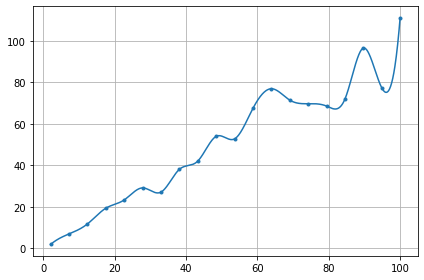

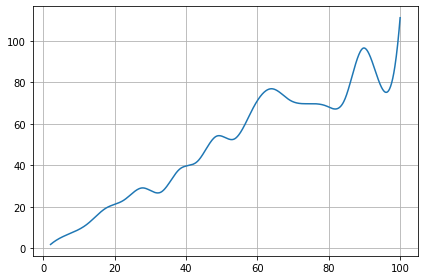

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

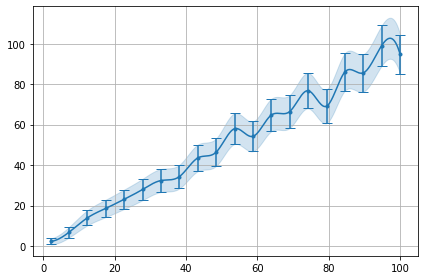

''

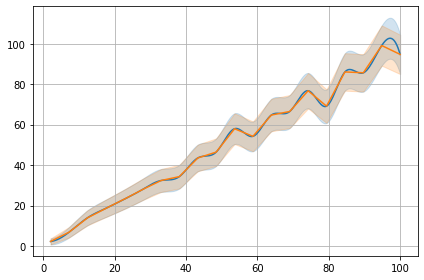

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False,init=False,interpolator='linear')
""

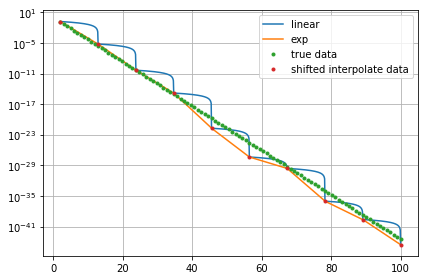

lin Chi2:0.06023288572935324
exp Chi2:0.0006538148849902931


In [4]:
x = np.linspace(2,100,10)
y = np.exp(-stat.noisy(x,std=0.05))

ff1=plot.data(x,y,interpolate=True,also_data=False,interpolator='linear',logy=True,interpolate_label="linear")
ff2=plot.data(x,y,interpolate=True,also_data=False,interpolator='exp',logy=True,init=False,interpolate_label="exp")


f1 = interp.interpolate(x,y,interpolator="exp")
f2 = lambda x_ : np.exp(interp.interpolate(x,unp.log(y),interpolator="linear")(x_))
x2 = np.linspace(2,100,100)

plot.data(x2,np.exp(-x2),logy=True,init=False,label="true data")
plot.data(x,f2(x),logy=True,init=False,label="shifted interpolate data")
plot.show()

print("lin Chi2:" + str(stat.Chi2(ff1[0](x2),np.exp(-x2))))
print("exp Chi2:" + str(stat.Chi2(ff2[0](x2),np.exp(-x2))))

## Interpolate 2d

[  0. -25.   0.  75. 200. -25. -50. -25.  50. 175.   0. -25.   0.  75.
 200.  75.  50.  75. 150. 275. 200. 175. 200. 275. 400.]
[ 1.49435089e-15 -2.50000000e+01 -3.55271368e-14  7.50000000e+01
  2.00000000e+02 -2.50000000e+01 -5.00000000e+01 -2.50000000e+01
  5.00000000e+01  1.75000000e+02  7.10542736e-15 -2.50000000e+01
  3.37507799e-14  7.50000000e+01  2.00000000e+02  7.50000000e+01
  5.00000000e+01  7.50000000e+01  1.50000000e+02  2.75000000e+02
  2.00000000e+02  1.75000000e+02  2.00000000e+02  2.75000000e+02
  4.00000000e+02]


Text(0.5, 1.0, 'interpolated data')

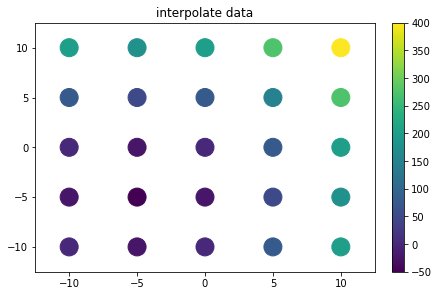

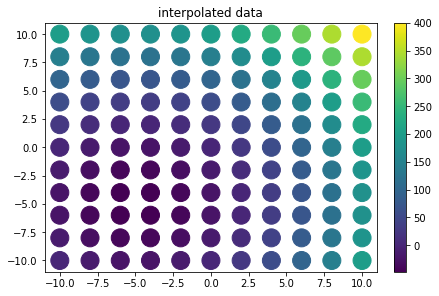

In [5]:
xvalues = np.linspace(-10,10,5)
yvalues = np.linspace(-10,10,5)
xx, yy = data.flatmesh(xvalues, yvalues)
zz=xx**2+yy**2+10*xx+10*yy
print(zz)
plot.plot2d(xx,yy,zz,fill_missing=False,style='scatter',logz=False)
plot.title("interpolate data")
f=interp.interpolate(xx,yy,zz)
print(f(xx,yy))
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.title("interpolated data")

/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,8 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Text(0.5, 1.0, 'bivariatespline interpolated data')

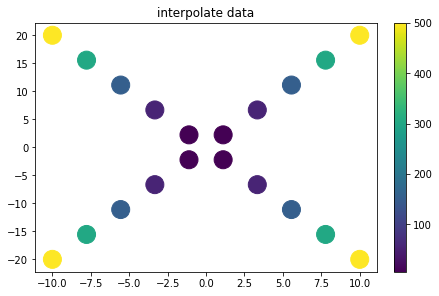

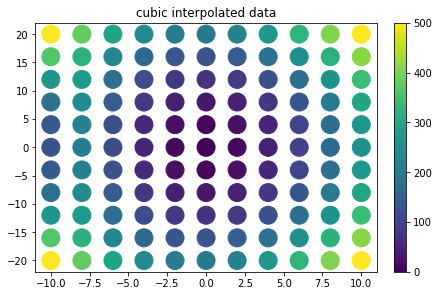

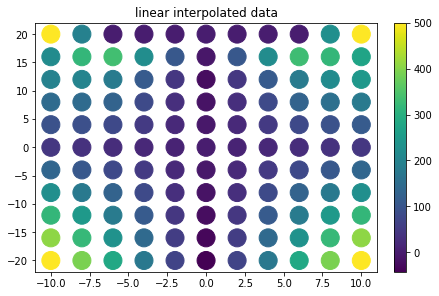

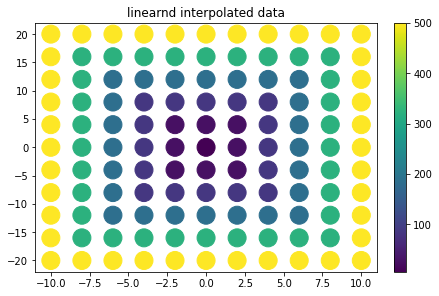

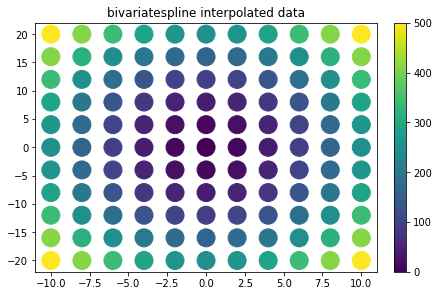

In [6]:
xvalues = np.linspace(-10,10,10)
yvalues = xvalues*2
xx = xvalues
yy = yvalues
xx = np.append(xx,xx)
yy = np.append(yy,-yy)
zz = xx**2+yy**2
f_cub=interp.interpolate(xx,yy,zz)
f_lin=interp.interpolate(xx,yy,zz,interpolator='linear')
f_lind=interp.interpolate(xx,yy,zz,interpolator='linearnd')
f_bi=interp.interpolate(xx,yy,zz,interpolator='bivariatespline')
plot.plot2d(xx,yy,xx**2+yy**2,style='scatter',fill_missing=True,logz=False)
plot.title("interpolate data")
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-20,20,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f_cub(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.title("cubic interpolated data")
plot.plot2d(xx,yy,f_lin(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.title("linear interpolated data")
plot.plot2d(xx,yy,f_lind(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.title("linearnd interpolated data")
plot.plot2d(xx,yy,f_bi(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.title("bivariatespline interpolated data")

### scipy vs smpl code

Example taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html

In [7]:
import numpy as np
rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = np.hypot(x, y)
lX = np.linspace(min(x), max(x))
lY = np.linspace(min(y), max(y))
X, Y = np.meshgrid(lX, lY)  # 2D grid for interpolation


#### scipy code

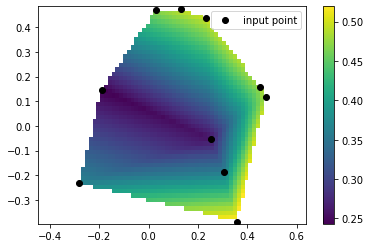

In [8]:
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
# interpolate
interp = LinearNDInterpolator(list(zip(x, y)), z)
# evaluate interpoaltion function
Z = interp(X, Y)
# plot it
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

#### smpl code

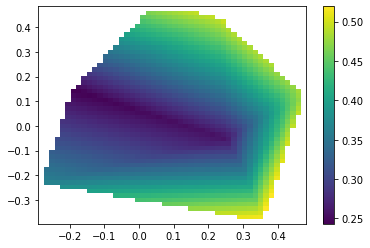

In [9]:
from smpl import interpolate as interpol
from smpl import plot,data
f=interpol.interpolate(x,y,z,interpolator='linearnd')
plot.plot2d(X,Y,f(X,Y),logz=False)

### Pre and Post transformations

It might turn out that some behaviour/shape of the function is known.
Including this into the interpolation improves the result as was seen in previos 1d expolential interpolation section.

In [10]:
import numpy as np
rng = np.random.default_rng()
x = 20*rng.random(50)
y = 20*rng.random(50)
tx = np.linspace(min(x), max(x))
ty = np.linspace(min(y), max(y))
z = np.exp(-stat.noisy(x+y,std=0.05))
X, Y = np.meshgrid(tx, ty)  # 2D grid for interpolation
tz = np.exp(-np.abs(X)-np.abs(Y))

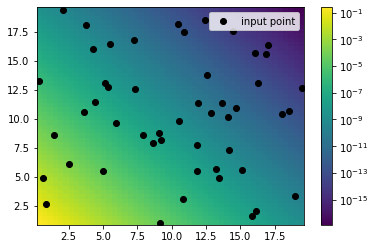

In [11]:
plot.plot2d(X,Y,tz,logz=True)
plt.plot(x, y, "ok", label="input point")
plt.legend()

Chi2: 0.03282587066722886
R2: -0.060186851750442916
var: 11+/-32


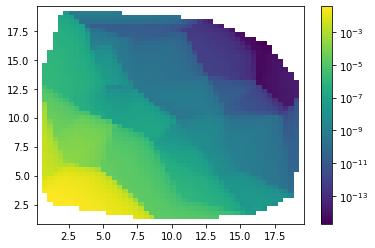

In [12]:
f=interpol.interpolate(x,y,z,interpolator='linearnd')
plot.plot2d(X,Y,f(X,Y),logz=True)
r= f(X,Y).flatten()[~np.isnan(f(X,Y).flatten())]
t = tz.flatten()[~np.isnan(f(X,Y).flatten())]
print("Chi2: " + str(stat.Chi2(r,t)))
print("R2: " + str(stat.R2(r,t)))
print("var: " + str(stat.average_deviation(r,t)))

Chi2: 7.615954354726055e-05
R2: -0.007991524907255965
var: 0.6+/-0.9


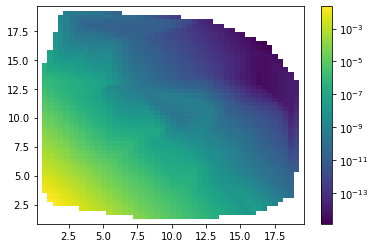

In [13]:
f=interpol.interpolate(x,y,z,interpolator='linearnd',pre=np.log,post=np.exp)
plot.plot2d(X,Y,f(X,Y),logz=True)
r= f(X,Y).flatten()[~np.isnan(f(X,Y).flatten())]
t = tz.flatten()[~np.isnan(f(X,Y).flatten())]
print("Chi2: " + str(stat.Chi2(r,t)))
print("R2: " + str(stat.R2(r,t)))
print("var: " + str(stat.average_deviation(r,t)))